  X|Y|clos_centr|dis_a|dis_b|dis_c
[[1. 2. 0. 0. 0. 0.]
 [2. 1. 0. 0. 0. 0.]
 [2. 3. 0. 0. 0. 0.]
 [3. 2. 0. 0. 0. 0.]
 [7. 2. 0. 0. 0. 0.]
 [8. 1. 0. 0. 0. 0.]
 [8. 3. 0. 0. 0. 0.]
 [9. 2. 0. 0. 0. 0.]
 [1. 8. 0. 0. 0. 0.]
 [2. 7. 0. 0. 0. 0.]
 [2. 9. 0. 0. 0. 0.]
 [3. 8. 0. 0. 0. 0.]]


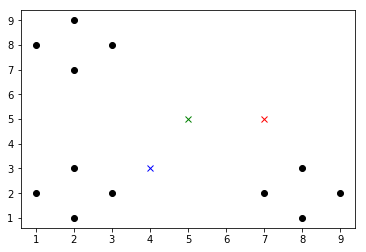

In [238]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from dataclasses import dataclass

@dataclass        
class centroid:
    x: float
    y: float
    counter: int = 0
    score_x: float = 0
    score_y: float = 0

cluster_guess=3        
a = centroid(4, 3, 0, 0, 0) #entweder nur x, y koordinate oder alles mit 0 initialisieren
b = centroid(5, 5)
c = centroid(7, 5)


#create array with points and distance to n centroids [x, y, closest centroid, dis_a, dis_b, dis_c, ...]...
#closest centroid a=1, b=2, c=3, ...
array = np.zeros((12, cluster_guess + 3)) #eigentlich: np.zeros("Anzahl der Datenpunkte", cluster_guess + 3 )
height, width = array.shape

#load data: autonomes Laden der Daten
array[0] = [1, 2, 0, 0, 0, 0]
array[1] = [2, 1, 0, 0, 0, 0]
array[2] = [2, 3, 0, 0, 0, 0]
array[3] = [3, 2, 0, 0, 0, 0]

array[4] = [7, 2, 0, 0, 0, 0]
array[5] = [8, 1, 0, 0, 0, 0]
array[6] = [8, 3, 0, 0, 0, 0]
array[7] = [9, 2, 0, 0, 0, 0]

array[8] = [1, 8, 0, 0, 0, 0]
array[9] = [2, 7, 0, 0, 0, 0]
array[10] = [2, 9, 0, 0, 0, 0]
array[11] = [3, 8, 0, 0, 0, 0]



plt.figure()


def plot_array(): #erstellt ein Plot mit den centroiden und den Punkten in der jeweiligen Farbe/Form
    
    plt.plot(a.x, a.y, 'bx')
    plt.plot(b.x, b.y, 'gx')
    plt.plot(c.x, c.y, 'rx')
    
    #je nachdem welcher centroid am nächsten ist, wird eine Farbe zugeordnet
    for counter, value in enumerate(array):
        if value[2] == 0:
            plt.plot(value[0],value[1], 'ko')
            
        elif value[2] == 1:
            plt.plot(value[0],value[1], 'bo')
            
        elif value[2] == 2:
            plt.plot(value[0],value[1], 'go')
            
        if value[2] == 3:
            plt.plot(value[0],value[1], 'ro')
       
    
#Berechnet Abstand zwischen einem Punkt und einem Centroid und gibt diesen zurück
def distance_to_point(x, y, centroid):
    del_x = x-centroid.x 
    del_y = y-centroid.y
    del_x = -del_x if del_x<0 else del_x
    del_y = -del_y if del_y<0 else del_y
    distance = math.sqrt(del_x*del_x + del_y*del_y)
    return distance

print("  X|Y|clos_centr|dis_a|dis_b|dis_c")
print(array)
plot_array()

plt.show()    

In [235]:
#Funktion die für den jeweiligen Centroid den Abstand berechnet und in das Array schreibt
def measure_distance():
    
    for counter_array, value in enumerate(array):
        distance_a = distance_to_point(value[0], value[1], a)
        array[counter_array, 3] = distance_a
        
    for counter_array, value in enumerate(array):
        distance_b = distance_to_point(value[0], value[1], b)
        array[counter_array, 4] = distance_b
        
    for counter_array, value in enumerate(array):
        distance_c = distance_to_point(value[0], value[1], c)
        array[counter_array, 5] = distance_c
            
measure_distance()   
print("  X          Y         clos_centr  dis_a      dis_b      dis_c")
print(array)

  X          Y         clos_centr  dis_a      dis_b      dis_c
[[1.         2.         0.         3.16227766 5.         6.70820393]
 [2.         1.         0.         2.82842712 5.         6.40312424]
 [2.         3.         0.         2.         3.60555128 5.38516481]
 [3.         2.         0.         1.41421356 3.60555128 5.        ]
 [7.         2.         0.         3.16227766 3.60555128 3.        ]
 [8.         1.         0.         4.47213595 5.         4.12310563]
 [8.         3.         0.         4.         3.60555128 2.23606798]
 [9.         2.         0.         5.09901951 5.         3.60555128]
 [1.         8.         0.         5.83095189 5.         6.70820393]
 [2.         7.         0.         4.47213595 3.60555128 5.38516481]
 [2.         9.         0.         6.32455532 5.         6.40312424]
 [3.         8.         0.         5.09901951 3.60555128 5.        ]]


In [236]:
#measure closest centroid and assigns to array
#closest centroid a=1, b=2, c=3

def closest_centroid():
    for counter_array, value in enumerate(array):
        distance_a = value[3]
        distance_b = value[4]
        distance_c = value[5]
    
        if distance_a < distance_b and distance_a < distance_c:
            value[2] = 1
            
        elif distance_b < distance_a and distance_b < distance_c:
            value[2] = 2
            
        elif distance_c < distance_b and distance_c < distance_a:
            value[2] = 3
        
        else:
            print("Error: zwei gleiche Abstände bei Punkt " + str(counter_array +1))
        
closest_centroid()     
print("  X          Y         clos_centr  dis_a      dis_b      dis_c")
print(array)

  X          Y         clos_centr  dis_a      dis_b      dis_c
[[1.         2.         1.         3.16227766 5.         6.70820393]
 [2.         1.         1.         2.82842712 5.         6.40312424]
 [2.         3.         1.         2.         3.60555128 5.38516481]
 [3.         2.         1.         1.41421356 3.60555128 5.        ]
 [7.         2.         3.         3.16227766 3.60555128 3.        ]
 [8.         1.         3.         4.47213595 5.         4.12310563]
 [8.         3.         3.         4.         3.60555128 2.23606798]
 [9.         2.         3.         5.09901951 5.         3.60555128]
 [1.         8.         2.         5.83095189 5.         6.70820393]
 [2.         7.         2.         4.47213595 3.60555128 5.38516481]
 [2.         9.         2.         6.32455532 5.         6.40312424]
 [3.         8.         2.         5.09901951 3.60555128 5.        ]]


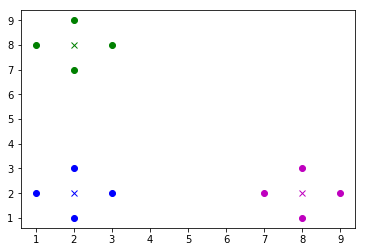

In [237]:
#für die centroiden werden die x und y koordinaten der zugehörigen punkte addiert und durch die Anzahl der zugeordneten Punkte geteilt
def reassign_centroid():
    
    #läuft durch das array, sammelt alle daten und speichert diese temporär ab
    for counter_array, value in enumerate(array):
       
        if value[2] == 1:
            a.counter += 1
            a.score_x += value[0]
            a.score_y += value[1]
            
        elif value[2] == 2:
            b.counter += 1
            b.score_x += value[0]
            b.score_y += value[1]
            
        elif value[2] == 3:
            c.counter += 1
            c.score_x += value[0]
            c.score_y += value[1]
        
    #berechnung der neuen werte        
    a.x = a.score_x / a.counter
    a.y = a.score_y / a.counter
    b.x = b.score_x / b.counter
    b.y = b.score_y / b.counter
    c.x = c.score_x / c.counter
    c.y = c.score_y / c.counter
    
   
    #setzt die temporären daten wieder zurück
    a.counter = 0
    a.score_x = 0
    a.score_y = 0
    b.counter = 0
    b.score_x = 0
    b.score_y = 0
    c.counter = 0
    c.score_x = 0
    c.score_y = 0

plt.figure()
reassign_centroid()


plot_array()
plt.show()

